# IAM Risk Classification Project

In [1]:
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.5
astropy-iers-data==0.2024.11.4.0.33.34
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install torch transformers pandas numpy scipy scikit-learn plotly tqdm -qU

In [4]:
import os
PROJECT_DIR = '/content/drive/MyDrive/project/iam_risk_classification'

In [5]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [52]:
import os
import json

config = {
    "project": {
        "name": "iam_risk_classification",
        "description": "Multi-Label Risk Classification of Cloud IAM Actions"
    },
    "data": {
        "sources": ["aws", "azure", "gcp"],
        "risk_categories": [
            "credential_exposure",
            "data_access",
            "privilege_escalation",
            "resource_exposure"
        ],
        "train_test_split": {
            "train": 0.7,
            "validation": 0.15,
            "test": 0.15
        }
    },
    "model": {
        "architecture": "bert-base-uncased",
        "max_length": 128,
        "batch_size": 32,
        "learning_rate": 2e-5,
        "epochs": 100,
        "dropout": 0.1
    },
    "training": {
        "seed": 42,
        "gpu": True,
        "early_stopping_patience": 3
    },
    "paths": {
        "raw_data": f"{PROJECT_DIR}/data/raw",
        "processed_data": f"{PROJECT_DIR}/data/processed",
        "labeled_data": f"{PROJECT_DIR}/data/labeled",
        "models": f"{PROJECT_DIR}/models",
        "config": f"{PROJECT_DIR}/config",
        "results": f"{PROJECT_DIR}/results"
    }
}

# config = {
#     'project': {
#         'name': 'iam_risk_classification',
#         'version': '0.1.0',
#         'seed': 42,
#         "data_sources": ["aws", "azure", "gcp"],
#         "risk_categories": [
#           "credential_exposure",
#           "data_access",
#           "privilege_escalation",
#           "resource_exposure"
#       ]
#     },
#     'data': {
#         'raw_data_path': f'{PROJECT_DIR}/data/raw',
#         'processed_data_path': f'{PROJECT_DIR}/data/processed',
#         'train_ratio': 0.7,
#         'val_ratio': 0.15,
#         'test_ratio': 0.15
#     },
#     'model': {
#         'name': 'bert-base-uncased',
#         'num_labels': 4,
#         'hidden_size': 768,
#         'dropout': 0.1,
#         "max_length": 128,
#         "batch_size": 32,
#         "learning_rate": 2e-5,
#         "epochs": 10
#     },
#     'training': {
#         'batch_size': 32,
#         'learning_rate': 2e-5,
#         'num_epochs': 10,
#         'warmup_steps': 500,
#         'weight_decay': 0.01,
#         'gradient_clip': 1.0
#     }
# }

DIRECTORIES = [
    'notebooks',
    'data/raw',
    'data/processed',
    'data/labeled',
    'models',
    'results',
    'config'
]

for dir_path in DIRECTORIES:
    full_path = os.path.join(PROJECT_DIR, dir_path)
    os.makedirs(full_path, exist_ok=True)
    print(f"Created directory: {full_path}")

os.makedirs(os.path.dirname(f'{PROJECT_DIR}/config/config.json'), exist_ok=True)

config_path = os.path.join(PROJECT_DIR, 'config', 'config.json')
with open(config_path, 'w') as f:
    json.dump(config, f, indent=2)
print(f"Configuration saved to: {config_path}")

Created directory: /content/drive/MyDrive/project/iam_risk_classification/notebooks
Created directory: /content/drive/MyDrive/project/iam_risk_classification/data/raw
Created directory: /content/drive/MyDrive/project/iam_risk_classification/data/processed
Created directory: /content/drive/MyDrive/project/iam_risk_classification/data/labeled
Created directory: /content/drive/MyDrive/project/iam_risk_classification/models
Created directory: /content/drive/MyDrive/project/iam_risk_classification/results
Created directory: /content/drive/MyDrive/project/iam_risk_classification/config
Configuration saved to: /content/drive/MyDrive/project/iam_risk_classification/config/config.json


In [ ]:
def verify_setup():
    """Verify the project setup"""
    print("1. Checking Directory Structure:")
    for dir_path in DIRECTORIES:
        full_path = os.path.join(PROJECT_DIR, dir_path)
        status = "✅" if os.path.exists(full_path) else "❌"
        print(f"{status} {full_path}")

    print("\n2. Checking Configuration:")
    if os.path.exists(config_path):
        print("✅ Configuration file created")
    else:
        print("❌ Configuration file missing")

    print("\n3. Checking GPU Availability:")
    import torch
    if torch.cuda.is_available():
        print(f"✅ GPU available: {torch.cuda.get_device_name(0)}")
    else:
        print("⚠️ No GPU detected")

    print("\n4. Checking Required Packages:")
    required_packages = ['transformers', 'torch', 'pandas', 'numpy', 'scikit-learn', 'wandb']
    import pkg_resources
    for package in required_packages:
        try:
            dist = pkg_resources.get_distribution(package)
            print(f"✅ {package} ({dist.version})")
        except pkg_resources.DistributionNotFound:
            print(f"❌ {package} not found")

verify_setup()

1. Checking Directory Structure:
✅ /content/drive/MyDrive/project/iam_risk_classification/notebooks
✅ /content/drive/MyDrive/project/iam_risk_classification/data/raw
✅ /content/drive/MyDrive/project/iam_risk_classification/data/processed
✅ /content/drive/MyDrive/project/iam_risk_classification/data/labeled
✅ /content/drive/MyDrive/project/iam_risk_classification/models
✅ /content/drive/MyDrive/project/iam_risk_classification/results
✅ /content/drive/MyDrive/project/iam_risk_classification/config

2. Checking Configuration:
✅ Configuration file created

3. Checking GPU Availability:
✅ GPU available: NVIDIA A100-SXM4-40GB

4. Checking Required Packages:
✅ transformers (4.46.2)
✅ torch (2.5.0+cu121)
✅ pandas (2.2.2)
✅ numpy (1.26.4)
✅ scikit-learn (1.5.2)
✅ wandb (0.18.6)


<ipython-input-69-0ff7b5c5bcea>:24: DeprecationWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html



In [7]:
with open(f"{PROJECT_DIR}/config/config.json", 'r') as f:
    CONFIG = json.load(f)

In [8]:
import re
import plotly.express as px
import pandas as pd

def collect_aws_actions():
    """Collect AWS IAM actions from public documentation"""
    actions = [
        "iam:CreateAccessKey",
        "s3:GetObject",
        "ec2:RunInstances",
        "iam:ListAccessKeys",
        "iam:DeleteAccessKey",
        "iam:UpdateAccessKey",
    ]
    return pd.DataFrame({'provider': 'aws', 'action': actions})

def preprocess_action(action):
    """Clean and normalize IAM action string"""
    # Remove special characters
    action = re.sub(r'[^a-zA-Z0-9:\-*]', ' ', action)
    # Convert to lowercase
    action = action.lower()
    return action


# Collect data
df_aws = collect_aws_actions()
# Add similar functions for Azure and GCP

# Combine all data
df = pd.concat([df_aws], ignore_index=True)
print(f"Collected {len(df)} actions")

# Apply preprocessing
df['action_processed'] = df['action'].apply(preprocess_action)

# Save processed data
df.to_csv(f"{CONFIG['paths']['processed_data']}/processed_actions.csv", index=False)



Collected 6 actions


In [9]:
!pip install boto3 requests beautifulsoup4 -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.9 MB/s eta 0:00:00


In [10]:
import boto3
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import yaml

class IAMActionCollector:
    def __init__(self, save_path):
        self.save_path = save_path

    def collect_aws_iam_actions_from_site(self):
        """Collect AWS IAM actions and their descriptions"""
        # Get IAM client
        iam = boto3.client('iam')

        # Get all AWS services that support IAM
        url = "https://docs.aws.amazon.com/service-authorization/latest/reference/reference_policies_actions-resources-contextkeys.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        actions_data = []

        # Parse each service's actions
        for service in tqdm(soup.find_all('div', class_='awsdocs-service-list')):
            service_name = service.find('h2').text.strip()

            # Get service prefix
            prefix = service_name.split()[0].lower()

            # Get service actions documentation
            service_url = f"https://docs.aws.amazon.com/service-authorization/latest/reference/list_{prefix}.html"
            service_response = requests.get(service_url)

            if service_response.status_code == 200:
                service_soup = BeautifulSoup(service_response.text, 'html.parser')

                # Extract actions table
                actions_table = service_soup.find('div', class_='table-contents')
                if actions_table:
                    for row in actions_table.find_all('tr')[1:]:  # Skip header
                        cols = row.find_all('td')
                        if len(cols) >= 2:
                            action = cols[0].text.strip()
                            description = cols[1].text.strip()

                            actions_data.append({
                                'service': service_name,
                                'action': action,
                                'description': description,
                                'source': 'aws'
                            })

        # Convert to DataFrame
        df = pd.DataFrame(actions_data)

        # Save raw data
        df.to_csv(f"{self.save_path}/raw/aws_iam_actions.csv", index=False)
        print(f"Collected {len(df)} AWS IAM actions")

        return df

    def collect_aws_iam_actions_from_yaml(self):
      # Define risk categories
      risk_categories = ["CredentialExposure", "DataAccess", "PrivEsc", "ResourceExposure"]

      # Load the YAML file
      with open(f"{self.save_path}/raw/aws.yaml", 'r') as file:
          data = yaml.safe_load(file)

      # Prepare list to collect action details
      actions_list = []

      # Process each risk category and actions within
      for category, category_data in data.items():
          for action_item in category_data['Actions']:
              for action_name, details in action_item.items():
                  action_data = {
                      "service_name": details['service_name'],
                      "action_name": action_name,
                      "access_type": details['access_level'],
                      "description": details['description']
                  }
                  # Set risk category flags based on the YAML data
                  for risk in risk_categories:
                      action_data[f"risk_category_{risk.lower()}"] = 1 if risk in details['risk_category'] else 0

                  actions_list.append(action_data)

      # Convert list to DataFrame
      df = pd.DataFrame(actions_list)
      df.to_csv(f"{self.save_path}/raw/aws_iam_actions_from_yaml.csv", index=False)
      print(f"Collected {len(df)} AWS IAM actions")

      return df

    def collect_aws_iam_actions(self):
        """Collect AWS IAM actions and their descriptions"""

    def collect_azure_iam_actions(self):
        """Collect Azure IAM actions and their descriptions"""
        # Implementation for Azure
        pass

    def collect_gcp_iam_actions(self):
        """Collect GCP IAM actions and their descriptions"""
        # Implementation for GCP
        pass

    def create_unified_dataset(self):
        """Combine data from all cloud providers"""
        # Read individual datasets
        aws_df = pd.read_csv(f"{self.save_path}/raw/aws_iam_actions.csv")
        azure_df = pd.read_csv(f"{self.save_path}/raw/azure_iam_actions.csv")
        gcp_df = pd.read_csv(f"{self.save_path}/raw/gcp_iam_actions.csv")

        # Combine datasets
        combined_df = pd.concat([aws_df, azure_df, gcp_df], ignore_index=True)

        # Save combined dataset
        combined_df.to_csv(f"{self.save_path}/processed/combined_iam_actions.csv", index=False)

        return combined_df

In [11]:
def collect_full_aws_actions():
    # Initialize collector
    collector = IAMActionCollector(f'{PROJECT_DIR}/data')

    # Collect AWS data
    return collector.collect_aws_iam_actions_from_yaml()

aws_df = collect_full_aws_actions()

Collected 521 AWS IAM actions


In [12]:
# Basic analysis
print("\nData Collection Summary:")
print(f"Total AWS actions collected: {len(aws_df)}")
print("\nServices breakdown:")
print(aws_df['service_name'].value_counts().head())

# Save sample data for labeling
sample_df = aws_df.sample(n=min(500, len(aws_df)), random_state=42)
sample_df.to_csv(f'{PROJECT_DIR}/data/labeled/aws_labeling.csv', index=False)

print(f'Sample saved for labeling at: {PROJECT_DIR}/data/labeled/aws_labeling.csv')


Data Collection Summary:
Total AWS actions collected: 521

Services breakdown:
service_name
AWS Identity and Access Management (IAM)    106
AWS IAM Identity Center                      31
AWS CodeCommit                               28
AWS IAM Identity Center Directory            18
Amazon QuickSight                            16
Name: count, dtype: int64
Sample saved for labeling at: /content/drive/MyDrive/project/iam_risk_classification/data/labeled/aws_labeling.csv


In [13]:
fig = px.histogram(sample_df, x='service_name', title='Action count by Service')
fig.show()

In [24]:
# !pip install -qU google-cloud google-cloud-iam azure-identity azure-mgmt-authorization
!pip install -qU azure-identity azure-mgmt-authorization
!pip install -qU google-api-python-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 111.0 MB/s eta 0:00:00


Section 1: Setup and Configuration
* Import required libraries
* Load project configuration
* Initialize cloud clients (AWS, Azure, GCP)
* Set up logging and tracking

In [27]:
import os
import sys
import json
import logging
import pandas as pd
import numpy as np
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import boto3
# from google.cloud import iam_v1
from azure.identity import DefaultAzureCredential
from azure.mgmt.authorization import AuthorizationManagementClient
import wandb
from datetime import datetime

# Set up logging
def setup_log():
    log_dir = f"{PROJECT_DIR}/logs"
    os.makedirs(log_dir, exist_ok=True)

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(f"{log_dir}/data_collection_{datetime.now().strftime('%Y%m%d')}.log"),
            logging.StreamHandler()
        ]
    )
    return logging.getLogger(__name__)

logger = setup_log()

# Load project configuration
def load_config():
    config_path = f"{PROJECT_DIR}/config/config.json"
    with open(config_path, 'r') as f:
        return json.load(f)

config = load_config()

# Initialize cloud clients
def initialize_cloud_clients():
    try:
        # AWS client
        aws_client = boto3.client('iam')
        logger.info("AWS client initialized successfully")
    except Exception as e:
        logger.error(f"Error initializing AWS client: {str(e)}")
        aws_client = None

    try:
        # Azure client
        azure_client = None
        # azure_credential = DefaultAzureCredential()
        # azure_client = AuthorizationManagementClient(
        #     credential=azure_credential,
        #     subscription_id= config.get('azure_subscription_id')
        # )
        logger.info("Azure client initialized successfully")
    except Exception as e:
        logger.error(f"Error initializing Azure client: {str(e)}")
        azure_client = None

    try:
        # GCP client
        gcp_client = None
        # gcp_client = iam_v1.IAMClient()
        logger.info("GCP client initialized successfully")
    except Exception as e:
        logger.error(f"Error initializing GCP client: {str(e)}")
        gcp_client = None

    return aws_client, azure_client, gcp_client

# Initialize Weights & Biases for experiment tracking
wandb.init(
    project=config['project']['name'],
    config=config,
    tags=['data_collection']
)

# Create necessary directories
def create_directories():
    directories = [
        config['paths']['raw_data'],
        config['paths']['processed_data'],
        config['paths']['models']
    ]
    for directory in directories:
        os.makedirs(directory, exist_ok=True)
        logger.info(f"Created directory: {directory}")

logger.info("Starting setup and configuration")
create_directories()
aws_client, azure_client, gcp_client = initialize_cloud_clients()
logger.info("Setup complete")

wandb: Currently logged in as: anowarislam (iam-classification). Use `wandb login --relogin` to force relogin


Section 2: Data Collection

2.1 AWS IAM Actions
* Scrape AWS IAM documentation
* Extract actions and descriptions
* Save raw AWS data
2.2 Azure IAM Actions
* Access Azure RBAC actions
* Extract permissions and operations
* Save raw Azure data
2.3 GCP IAM Actions
* Collect GCP IAM roles and permissions
* Extract action descriptions
* Save raw GCP data

In [28]:
class CloudIAMCollector:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        self.raw_data_path = config['paths']['raw_data']

    def collect_aws_iam_actions(self):
        """Collect AWS IAM actions and descriptions"""
        self.logger.info("Starting AWS IAM action collection")
        actions_data = []

        try:
            # Get AWS services documentation page
            url = "https://docs.aws.amazon.com/service-authorization/latest/reference/reference_policies_actions-resources-contextkeys.html"
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')

            # Process each service
            for service in tqdm(soup.find_all('div', class_='awsdocs-service-list')):
                service_name = service.find('h2').text.strip()
                prefix = service_name.split()[0].lower()

                # Get service-specific actions
                service_url = f"https://docs.aws.amazon.com/service-authorization/latest/reference/list_{prefix}.html"
                service_response = requests.get(service_url)

                if service_response.status_code == 200:
                    service_soup = BeautifulSoup(service_response.text, 'html.parser')
                    actions_table = service_soup.find('div', class_='table-contents')

                    if actions_table:
                        for row in actions_table.find_all('tr')[1:]:
                            cols = row.find_all('td')
                            if len(cols) >= 2:
                                actions_data.append({
                                    'service': service_name,
                                    'action': cols[0].text.strip(),
                                    'description': cols[1].text.strip(),
                                    'source': 'aws'
                                })

            # Save to CSV
            df = pd.DataFrame(actions_data)
            output_path = os.path.join(self.raw_data_path, 'aws_iam_actions.csv')
            df.to_csv(output_path, index=False)
            self.logger.info(f"Collected {len(df)} AWS IAM actions")

            return df

        except Exception as e:
            self.logger.error(f"Error collecting AWS IAM actions: {str(e)}")
            return None

    def collect_aws_iam_actions_from_yaml(self):
      #self.logger.info("starting AWS IAM action collection")
      print("starting AWS IAM action collection")
      # Define risk categories
      risk_categories = ["CredentialExposure", "DataAccess", "PrivEsc", "ResourceExposure"]

      # Load the YAML file
      with open(f"{self.raw_data_path}/aws.yaml", 'r') as file:
          data = yaml.safe_load(file)

      # Prepare list to collect action details
      actions_list = []

      # Process each risk category and actions within
      for category, category_data in data.items():
          for action_item in category_data['Actions']:
              for action_name, details in action_item.items():
                  action_data = {
                      'source': 'aws',
                      "service": details['service_name'],
                      "action": action_name,
                      "access": details['access_level'],
                      "description": details['description']
                  }
                  # Set risk category flags based on the YAML data
                  for risk in risk_categories:
                      action_data[f"risk_category_{risk.lower()}"] = 1 if risk in details['risk_category'] else 0

                  actions_list.append(action_data)

      # Convert list to DataFrame
      df = pd.DataFrame(actions_list)
      output_path = os.path.join(self.raw_data_path, 'aws_iam_actions_from_yaml.csv')
      df.to_csv(output_path, index=False)

      self.logger.info(f"collected {len(df)} AWS IAM actions")
      print(f"collected {len(df)} AWS IAM actions")

      return df

    def collect_azure_iam_actions(self, azure_client):
        """Collect Azure RBAC actions"""
        self.logger.info("Starting Azure RBAC action collection")
        actions_data = []

        try:
            # Get Azure role definitions
            role_definitions = azure_client.role_definitions.list(
                scope="/subscriptions/{}".format(self.config.get('azure_subscription_id'))
            )

            for role in role_definitions:
                for permission in role.permissions:
                    for action in permission.actions:
                        actions_data.append({
                            'service': action.split('/')[0] if '/' in action else 'unknown',
                            'action': action,
                            'description': role.description,
                            'source': 'azure'
                        })

            df = pd.DataFrame(actions_data)
            output_path = os.path.join(self.raw_data_path, 'azure_iam_actions.csv')
            df.to_csv(output_path, index=False)
            self.logger.info(f"Collected {len(df)} Azure RBAC actions")

            return df

        except Exception as e:
            self.logger.error(f"Error collecting Azure RBAC actions: {str(e)}")
            return None

    def collect_gcp_iam_actions(self, gcp_client):
        """Collect GCP IAM permissions"""
        self.logger.info("Starting GCP IAM permission collection")
        actions_data = []

        try:
            # Get all available services
            request = iam_v1.ListServicesRequest()
            services = gcp_client.list_services(request=request)

            for service in services:
                # Get permissions for each service
                permissions_request = iam_v1.QueryAuditableServicesRequest(
                    full_resource_name=service.name
                )
                permissions = gcp_client.query_auditable_services(request=permissions_request)

                for permission in permissions.services:
                    actions_data.append({
                        'service': service.name,
                        'action': permission.name,
                        'description': getattr(permission, 'description', ''),
                        'source': 'gcp'
                    })

            df = pd.DataFrame(actions_data)
            output_path = os.path.join(self.raw_data_path, 'gcp_iam_actions.csv')
            df.to_csv(output_path, index=False)
            self.logger.info(f"Collected {len(df)} GCP IAM permissions")

            return df

        except Exception as e:
            self.logger.error(f"Error collecting GCP IAM permissions: {str(e)}")
            return None

    def combine_all_data(self):
        """Combine data from all cloud providers"""
        try:
            aws_df = pd.read_csv(os.path.join(self.raw_data_path, 'aws_iam_actions.csv'))
            azure_df = pd.read_csv(os.path.join(self.raw_data_path, 'azure_iam_actions.csv'))
            gcp_df = pd.read_csv(os.path.join(self.raw_data_path, 'gcp_iam_actions.csv'))

            combined_df = pd.concat([aws_df, azure_df, gcp_df], ignore_index=True)
            output_path = os.path.join(self.raw_data_path, 'combined_iam_actions.csv')
            combined_df.to_csv(output_path, index=False)

            self.logger.info(f"Combined dataset created with {len(combined_df)} total actions")
            return combined_df

        except Exception as e:
            self.logger.error(f"Error combining data: {str(e)}")
            return None


collector = CloudIAMCollector(config, logger)

# Collect data from each cloud provider
aws_df = collector.collect_aws_iam_actions_from_yaml()
# azure_df = collector.collect_azure_iam_actions(azure_client)
# gcp_df = collector.collect_gcp_iam_actions(gcp_client)

# Combine all data
# combined_df = collector.combine_all_data()

combined_df = aws_df

starting AWS IAM action collection
collected 521 AWS IAM actions


In [29]:
print("\nData Collection Summary:")
print(f"Total AWS actions collected: {len(aws_df)}")
print("\nServices breakdown:")
print(combined_df['service'].value_counts().head())


Data Collection Summary:
Total AWS actions collected: 521

Services breakdown:
service
AWS Identity and Access Management (IAM)    106
AWS IAM Identity Center                      31
AWS CodeCommit                               28
AWS IAM Identity Center Directory            18
Amazon QuickSight                            16
Name: count, dtype: int64


Section 3: Data Cleaning and Standardization
* Remove duplicates
* Clean text descriptions
* Standardize action formats
* Handle missing values
* Create unified schema

In [30]:
import pandas as pd
import numpy as np
from typing import List, Dict
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

class IAMDataCleaner:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text: str) -> str:
        """Clean and standardize text descriptions"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and extra whitespace
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove stopwords
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if t not in self.stop_words]

        return ' '.join(tokens).strip()

    def standardize_action(self, action: str, source: str) -> str:
        """Standardize action format across cloud providers"""
        if pd.isna(action):
            return ""

        action = action.lower().strip()

        if source == 'aws':
            # AWS format: service:action
            if ':' not in action:
                action = f"aws:{action}"
        elif source == 'azure':
            # Azure format: Microsoft.Service/action
            action = action.replace('microsoft.', '').replace('/', ':')
        elif source == 'gcp':
            # GCP format: service.resource.verb
            action = action.replace('.', ':')

        return action

    def clean_dataset(self, df: pd.DataFrame) -> pd.DataFrame:
        """Clean and standardize the entire dataset"""
        self.logger.info("Starting data cleaning process")

        # Create copy of dataframe
        cleaned_df = df.copy()

        # Remove duplicates
        initial_rows = len(cleaned_df)
        cleaned_df.drop_duplicates(subset=['service', 'action'], inplace=True)
        self.logger.info(f"Removed {initial_rows - len(cleaned_df)} duplicate rows")

        # Clean text descriptions
        cleaned_df['description'] = cleaned_df['description'].apply(self.clean_text)

        # Standardize actions
        cleaned_df['action'] = cleaned_df.apply(
            lambda row: self.standardize_action(row['action'], row['source']),
            axis=1
        )

        # Handle missing values
        cleaned_df['description'].fillna('No description available', inplace=True)
        cleaned_df['service'].fillna('unknown', inplace=True)

        # Create unified schema
        cleaned_df['action_type'] = cleaned_df['action'].apply(
            lambda x: x.split(':')[-1] if ':' in x else x
        )

        # Add metadata columns
        cleaned_df['word_count'] = cleaned_df['description'].str.split().str.len()
        cleaned_df['has_resource'] = cleaned_df['description'].str.contains('resource|resources', case=False)

        self.logger.info("Data cleaning completed")
        return cleaned_df

    def create_unified_schema(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create unified schema for the dataset"""
        schema_df = df.copy()

        # Extract common patterns
        schema_df['verb'] = schema_df['action_type'].apply(
            lambda x: re.findall(r'^(get|list|create|delete|update|modify|describe)', x)[0]
            if re.findall(r'^(get|list|create|delete|update|modify|describe)', x)
            else 'other'
        )

        # Create resource type column
        schema_df['resource_type'] = schema_df['action'].apply(
            lambda x: x.split(':')[0] if ':' in x else 'unknown'
        )

        # Create access level column
        schema_df['access_level'] = schema_df['verb'].map({
            'get': 'read',
            'list': 'read',
            'describe': 'read',
            'create': 'write',
            'delete': 'write',
            'update': 'write',
            'modify': 'write',
            'other': 'unknown'
        })

        return schema_df


# Load raw data
# raw_data_path = os.path.join(config['paths']['raw_data'], 'combined_iam_actions.csv')
raw_data_path = os.path.join(config['paths']['raw_data'], 'aws_iam_actions_from_yaml.csv')

df = pd.read_csv(raw_data_path)

# Clean and standardize data
cleaner = IAMDataCleaner(config, logger)
cleaned_df = cleaner.clean_dataset(df)

# Create unified schema
final_df = cleaner.create_unified_schema(cleaned_df)

# Save processed data
output_path = os.path.join(config['paths']['processed_data'], 'cleaned_iam_actions.csv')
final_df.to_csv(output_path, index=False)
# logger.info(f"processed data saved to {output_path}")
print(f"processed data saved to {output_path}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-30-54ae2c62dd4e>:81: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-30-54ae2c62dd4e>:82: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series thro

processed data saved to /content/drive/MyDrive/project/iam_risk_classification/data/processed/cleaned_iam_actions.csv


Section 4: Initial Data Analysis
* Basic statistics
* Distribution analysis
* Action categorization
* Visualization of data characteristics
* Identify potential data quality issues

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from typing import Dict
import os

class IAMDataAnalyzer:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        # Use a more reliable default style
        plt.style.use('default')
        # Optionally set seaborn style if available
        try:
            sns.set_style("whitegrid")
        except Exception as e:
            self.logger.warning(f"Could not set seaborn style: {e}")

    def calculate_basic_statistics(self, df: pd.DataFrame) -> Dict:
        """
        Calculate basic statistics of the dataset

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data

        Returns:
            Dict: Dictionary containing various statistics about the dataset
        """
        stats = {
            'total_actions': len(df),
            'unique_services': df['service'].nunique(),
            'unique_action_types': df['action_type'].nunique(),
            'actions_per_source': df['source'].value_counts().to_dict(),
            'actions_per_access_level': df['access_level'].value_counts().to_dict(),
            'avg_description_length': df['word_count'].mean(),
            'missing_descriptions': df['description'].isna().sum()
        }
        return stats

    def analyze_distributions(self, df: pd.DataFrame) -> None:
        """
        Analyze and visualize data distributions

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data
        """
        # Ensure output directory exists
        os.makedirs(self.config['paths']['processed_data'], exist_ok=True)

        # Actions per service distribution
        plt.figure(figsize=(12, 6))
        service_counts = df['service'].value_counts()[:20]
        plt.bar(range(len(service_counts)), service_counts.values)
        plt.xticks(range(len(service_counts)), service_counts.index, rotation=45, ha='right')
        plt.title('Top 20 Services by Number of Actions')
        plt.tight_layout()
        plt.savefig(os.path.join(self.config['paths']['processed_data'], 'service_distribution.png'))
        plt.close()

        # Access level distribution
        plt.figure(figsize=(8, 8))
        access_counts = df['access_level'].value_counts()
        plt.pie(access_counts.values, labels=access_counts.index, autopct='%1.1f%%')
        plt.title('Distribution of Access Levels')
        plt.savefig(os.path.join(self.config['paths']['processed_data'], 'access_level_distribution.png'))
        plt.close()

        # Description length distribution
        plt.figure(figsize=(10, 6))
        plt.hist(df['word_count'].dropna(), bins=50)
        plt.title('Distribution of Description Lengths')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.savefig(os.path.join(self.config['paths']['processed_data'], 'description_length_distribution.png'))
        plt.close()

    def create_word_cloud(self, df: pd.DataFrame) -> None:
        """
        Create word cloud from action descriptions

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data
        """
        text = ' '.join(df['description'].dropna())
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=200,
            min_font_size=10
        ).generate(text)

        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.savefig(os.path.join(self.config['paths']['processed_data'], 'wordcloud.png'))
        plt.close()

    def analyze_action_patterns(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Analyze common patterns in actions

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data

        Returns:
            pd.DataFrame: Cross-tabulation matrix of verbs and resource types
        """
        # Handle potential missing values
        df_clean = df.fillna({'verb': 'unknown', 'resource_type': 'unknown'})

        # Verb analysis
        verb_patterns = df_clean['verb'].value_counts()
        self.logger.info(f"Top 10 verbs: {verb_patterns.head(10).to_dict()}")

        # Resource type analysis
        resource_patterns = df_clean['resource_type'].value_counts()
        self.logger.info(f"Top 10 resource types: {resource_patterns.head(10).to_dict()}")

        # Cross-tabulation of verbs and resource types
        pattern_matrix = pd.crosstab(df_clean['verb'], df_clean['resource_type'])

        return pattern_matrix

    def identify_quality_issues(self, df: pd.DataFrame) -> Dict:
        """
        Identify potential data quality issues

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data

        Returns:
            Dict: Dictionary containing various data quality metrics
        """
        issues = {
            'missing_values': {
                col: df[col].isna().sum()
                for col in df.columns
            },
            'short_descriptions': len(df[df['word_count'] < 5]),
            'unknown_access_levels': len(df[df['access_level'].str.lower() == 'unknown']),
            'ambiguous_actions': len(df[~df['action'].str.contains(':', na=False)]),
            'potential_duplicates': len(df) - len(df.drop_duplicates(subset=['action', 'description']))
        }

        # Additional quality checks
        issues['empty_strings'] = {
            col: len(df[df[col] == ''])
            for col in df.select_dtypes(include=['object']).columns
        }

        return issues

    def create_interactive_dashboard(self, df: pd.DataFrame) -> None:
        """
        Create interactive visualizations using plotly

        Parameters:
            df (pd.DataFrame): Input DataFrame containing IAM actions data
        """
        # Service breakdown
        fig1 = px.treemap(
            df.fillna({'source': 'unknown', 'service': 'unknown'}),
            path=['source', 'service'],
            title='Hierarchy of Cloud Services and Actions'
        )
        fig1.write_html(os.path.join(self.config['paths']['processed_data'], 'service_hierarchy.html'))

        # Action type distribution
        fig2 = px.sunburst(
            df.fillna({'source': 'unknown', 'access_level': 'unknown', 'verb': 'unknown'}),
            path=['source', 'access_level', 'verb'],
            title='Distribution of Action Types'
        )
        fig2.write_html(os.path.join(self.config['paths']['processed_data'], 'action_distribution.html'))

# Load cleaned data
data_path = os.path.join(config['paths']['processed_data'], 'cleaned_iam_actions.csv')
df = pd.read_csv(data_path)

# Initialize analyzer
analyzer = IAMDataAnalyzer(config, logger)

# Perform analysis
stats = analyzer.calculate_basic_statistics(df)
logger.info(f"Basic statistics: {stats}")

# Generate visualizations
analyzer.analyze_distributions(df)
analyzer.create_word_cloud(df)

# Analyze patterns
pattern_matrix = analyzer.analyze_action_patterns(df)
pattern_matrix.to_csv(os.path.join(config['paths']['processed_data'], 'action_patterns.csv'))

# Check data quality
quality_issues = analyzer.identify_quality_issues(df)
logger.info(f"Data quality issues: {quality_issues}")

# Create interactive visualizations
analyzer.create_interactive_dashboard(df)


In [32]:
from IPython.display import display, HTML

In [33]:
print("\n=== Dataset Overview ===")
display(HTML(f"<h3>Dataset Shape: {df.shape}</h3>"))
display(df.head().style.background_gradient())


=== Dataset Overview ===


,source,service,action,access,description,risk_category_credentialexposure,risk_category_dataaccess,risk_category_privesc,risk_category_resourceexposure,action_type,word_count,has_resource,verb,resource_type,access_level
0,aws,AWS AppSync,appsync:listapikeys,List,grants permission list api keys given api,1,0,0,0,listapikeys,7,False,list,appsync,read
1,aws,Amazon Athena,athena:getsession,Read,grants permission get session,1,0,0,0,getsession,4,False,get,athena,read
2,aws,AWS Chatbot,chatbot:getmicrosoftteamsoauthparameters,Read,grants permission generate oauth parameters request microsoft teams oauth code used aws chatbot service,1,0,0,0,getmicrosoftteamsoauthparameters,14,False,get,chatbot,read
3,aws,AWS Chatbot,chatbot:getslackoauthparameters,Read,grants permission generate oauth parameters request slack oauth code used aws chatbot service,1,0,0,0,getslackoauthparameters,13,False,get,chatbot,read
4,aws,Amazon Chime,chime:createapikey,Write,grants permission create new scim access key amazon chime account okta configuration,1,0,0,0,createapikey,12,False,create,chime,write


In [34]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   source                            485 non-null    object
 1   service                           485 non-null    object
 2   action                            485 non-null    object
 3   access                            485 non-null    object
 4   description                       485 non-null    object
 5   risk_category_credentialexposure  485 non-null    int64 
 6   risk_category_dataaccess          485 non-null    int64 
 7   risk_category_privesc             485 non-null    int64 
 8   risk_category_resourceexposure    485 non-null    int64 
 9   action_type                       485 non-null    object
 10  word_count                        485 non-null    int64 
 11  has_resource                      485 non-null    bool  
 12  verb   

In [35]:
print("\n=== Action Patterns ===")
display(pattern_matrix.style.background_gradient())


=== Action Patterns ===


resource_type,acm-pca,aoss,apigateway,appsync,athena,backup,cassandra,chatbot,chime,cleanrooms,cloud9,cloudformation,cloudfront,cloudsearch,cloudtrail,codeartifact,codebuild,codecommit,codeguru-profiler,codeguru-reviewer,codepipeline,codestar,cognito-identity,cognito-idp,cognito-sync,connect,datapipeline,dax,deeplens,ds,dynamodb,ec2,ec2-instance-connect,ecr,ecr-public,elasticfilesystem,elasticmapreduce,es,gamelift,glacier,glue,greengrass,health,healthlake,iam,imagebuilder,iot,iotsitewise,kendra,kinesis,kinesisvideo,kms,lakeformation,lambda,license-manager,lightsail,logs,macie2,mediapackage,mediastore,opsworks,qldb,quicksight,ram,rds,rds-db,redshift,robomaker,route53resolver,s3,s3-object-lambda,sagemaker,sdb,secretsmanager,serverlessrepo,servicecatalog,snowball,sns,sqs,ssm,sso,sso-directory,storagegateway,sts,support,waf,waf-regional,wafv2,workdocs,worklink,workmail,xray
verb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
create,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,1,0,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,5,3,0,0,0,0,0,1,0,0,0,0
delete,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,23,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,5,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,5,2,1,0,0,1,1,2,0,0,0,0
describe,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0
get,0,0,0,2,4,0,0,2,9,1,0,1,1,0,1,3,0,22,1,0,1,0,4,4,0,1,0,1,0,0,2,1,0,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,2,0,0,2,0,5,3,1,0,1,0,1,0,0,0,0,1,1,0,3,2,0,0,0,2,0,1,0,0,5,0,0,0,2,0,1,1,1,3,0,0,0
list,0,0,0,1,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0
modify,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
other,1,2,0,0,0,1,1,0,1,0,0,1,0,0,1,1,4,4,2,0,1,2,5,5,1,0,1,3,1,1,3,2,1,1,0,1,1,6,1,5,1,1,2,3,28,3,6,0,1,0,0,3,5,6,0,1,2,0,2,1,1,0,1,5,3,1,3,0,1,9,0,1,1,2,0,0,0,3,4,0,9,7,2,3,0,1,1,1,0,0,1,1
update,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,14,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,3,1,0,0,0,0,1,0,1,0,0


In [36]:
quality_df = pd.DataFrame([
            {'Category': 'Missing Values', 'Details': quality_issues['missing_values']},
            {'Category': 'Short Descriptions', 'Details': quality_issues['short_descriptions']},
            {'Category': 'Unknown Access Levels', 'Details': quality_issues['unknown_access_levels']},
            {'Category': 'Ambiguous Actions', 'Details': quality_issues['ambiguous_actions']},
            {'Category': 'Potential Duplicates', 'Details': quality_issues['potential_duplicates']},
            {'Category': 'Empty Strings', 'Details': quality_issues['empty_strings']}
        ])
display(quality_df.style.background_gradient())

,Category,Details
0,Missing Values,"{'source': 0, 'service': 0, 'action': 0, 'access': 0, 'description': 0, 'risk_category_credentialexposure': 0, 'risk_category_dataaccess': 0, 'risk_category_privesc': 0, 'risk_category_resourceexposure': 0, 'action_type': 0, 'word_count': 0, 'has_resource': 0, 'verb': 0, 'resource_type': 0, 'access_level': 0}"
1,Short Descriptions,15
2,Unknown Access Levels,186
3,Ambiguous Actions,0
4,Potential Duplicates,0
5,Empty Strings,"{'source': 0, 'service': 0, 'action': 0, 'access': 0, 'description': 0, 'action_type': 0, 'verb': 0, 'resource_type': 0, 'access_level': 0}"


Section 5: Expert Labeling
* Create labeling template
* Sample selection for manual labeling
* Risk category assignment
* Label validation and consistency check

In [37]:
import pandas as pd
import numpy as np
from typing import List, Dict, Set
import json
import csv
from sklearn.model_selection import train_test_split

class IAMLabeler:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        self.risk_categories = config['data']['risk_categories']

    def create_labeling_template(self, df: pd.DataFrame, sample_size: int = 500) -> pd.DataFrame:
        """Create template for manual labeling"""
        # Select sample for labeling
        sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)

        # Create template with necessary columns
        template_df = pd.DataFrame({
            'id': range(len(sample_df)),
            'source': sample_df['source'],
            'service': sample_df['service'],
            'action': sample_df['action'],
            'description': sample_df['description']
        })

        # Add columns for risk categories
        for category in self.risk_categories:
            template_df[category] = ''

        # Add columns for expert notes and confidence
        template_df['expert_notes'] = ''
        template_df['confidence_level'] = ''

        return template_df

    def export_labeling_template(self, template_df: pd.DataFrame) -> None:
        """Export template for manual labeling"""
        # Save as CSV
        template_path = f"{self.config['paths']['processed_data']}/labeling_template.csv"
        template_df.to_csv(template_path, index=False)

        # Create labeling guidelines
        guidelines = {
            'instructions': 'Please label each action with appropriate risk categories',
            'risk_categories': self.risk_categories,
            'labeling_values': {'0': 'No Risk', '1': 'Risk Present'},
            'confidence_levels': {'1': 'Low', '2': 'Medium', '3': 'High'},
            'notes_format': 'Please provide brief justification for high-risk assignments'
        }

        # Save guidelines
        with open(f"{self.config['paths']['processed_data']}/labeling_guidelines.json", 'w') as f:
            json.dump(guidelines, f, indent=2)

    def validate_labels(self, labeled_df: pd.DataFrame) -> Dict:
        """Validate labeled data for consistency and completeness"""
        validation_results = {
            'missing_labels': 0,
            'inconsistent_labels': 0,
            'low_confidence_labels': 0,
            'validation_errors': []
        }

        # Check for missing labels
        for category in self.risk_categories:
            missing = labeled_df[category].isna().sum()
            validation_results['missing_labels'] += missing
            if missing > 0:
                validation_results['validation_errors'].append(
                    f"Missing {missing} labels for category {category}"
                )

        # Check for inconsistent labels
        for idx, row in labeled_df.iterrows():
            # Check if high-risk actions have notes
            high_risk = any(row[cat] == 1 for cat in self.risk_categories)
            if high_risk and pd.isna(row['expert_notes']):
                validation_results['inconsistent_labels'] += 1
                validation_results['validation_errors'].append(
                    f"Missing notes for high-risk action at index {idx}"
                )

        # Check confidence levels
        low_confidence = labeled_df['confidence_level'] == 1
        validation_results['low_confidence_labels'] = low_confidence.sum()

        return validation_results

    def process_labeled_data(self, labeled_df: pd.DataFrame) -> pd.DataFrame:
        """Process and clean labeled data"""
        # Validate labels
        validation_results = self.validate_labels(labeled_df)
        self.logger.info(f"Label validation results: {validation_results}")

        # Convert labels to numeric
        for category in self.risk_categories:
            labeled_df[category] = labeled_df[category].astype(int)

        # Add metadata
        labeled_df['labeling_date'] = pd.Timestamp.now()
        labeled_df['label_quality'] = labeled_df['confidence_level'].map({
            1: 'low', 2: 'medium', 3: 'high'
        })

        return labeled_df


# Load cleaned data
data_path = os.path.join(config['paths']['processed_data'], 'cleaned_iam_actions.csv')
df = pd.read_csv(data_path)

# Initialize labeler
labeler = IAMLabeler(config, logger)

# Create and export labeling template
template_df = labeler.create_labeling_template(df)
labeler.export_labeling_template(template_df)

# After manual labeling is complete, process the labeled data
labeled_path = os.path.join(config['paths']['processed_data'], 'labeled_data.csv')
if os.path.exists(labeled_path):
    labeled_df = pd.read_csv(labeled_path)
    processed_labels = labeler.process_labeled_data(labeled_df)
    processed_labels.to_csv(
        f"{config['paths']['processed_data']}/processed_labels.csv",
        index=False
    )

Section 6: Feature Engineering
* Text preprocessing
* Token extraction
* Action pattern identification
* Service categorization
* Create feature matrices

In [38]:
# Section 6: Feature Engineering

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import spacy
from typing import Tuple, List
import re

class IAMFeatureEngineer:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        self.nlp = spacy.load('en_core_web_sm')
        self.tfidf = TfidfVectorizer(
            max_features=1000,
            stop_words='english',
            ngram_range=(1, 2)
        )

    def preprocess_text(self, text: str) -> str:
        """Preprocess text data"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', ' ', text)

        # Process with spaCy
        doc = self.nlp(text)

        # Lemmatization and filtering
        tokens = [
            token.lemma_ for token in doc
            if not token.is_stop and not token.is_punct
        ]

        return ' '.join(tokens)

    def extract_action_features(self, action: str) -> Dict:
        """Extract features from action string"""
        features = {
            'has_wildcard': '*' in action,
            'has_resource': ':resource:' in action.lower(),
            'action_depth': len(action.split(':')),
            'is_admin': 'admin' in action.lower(),
            'is_readonly': any(word in action.lower() for word in ['get', 'list', 'describe'])
        }
        return features

    def create_service_embeddings(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create service category embeddings"""
        # Encode services
        le = LabelEncoder()
        service_encoded = le.fit_transform(df['service'])

        # Create service mapping
        service_mapping = dict(zip(le.classes_, range(len(le.classes_))))

        # Save service mapping
        with open(f"{self.config['paths']['processed_data']}/service_mapping.json", 'w') as f:
            json.dump(service_mapping, f)

        return service_encoded

    def engineer_features(self, df: pd.DataFrame) -> Tuple[np.ndarray, List[str]]:
        """Create feature matrix"""
        self.logger.info("Starting feature engineering")

        # Text features
        self.logger.info("Processing text features")
        processed_descriptions = df['description'].apply(self.preprocess_text)
        text_features = self.tfidf.fit_transform(processed_descriptions)

        # Action features
        self.logger.info("Extracting action features")
        action_features = pd.DataFrame(
            df['action'].apply(self.extract_action_features).tolist()
        )

        # Service features
        self.logger.info("Creating service embeddings")
        service_features = self.create_service_embeddings(df)

        # Combine all features
        feature_matrix = np.hstack([
            text_features.toarray(),
            action_features.values,
            service_features.reshape(-1, 1)
        ])

        # Create feature names
        feature_names = (
            self.tfidf.get_feature_names_out().tolist() +
            action_features.columns.tolist() +
            ['service_category']
        )

        self.logger.info(f"Created feature matrix with shape {feature_matrix.shape}")
        return feature_matrix, feature_names

# Load processed labeled data
data_path = os.path.join(config['paths']['processed_data'], 'processed_labels.csv')
df = pd.read_csv(data_path)

# Initialize feature engineer
engineer = IAMFeatureEngineer(config, logger)

# Create feature matrix
feature_matrix, feature_names = engineer.engineer_features(df)

# Save features
np.save(f"{config['paths']['processed_data']}/feature_matrix.npy", feature_matrix)
with open(f"{config['paths']['processed_data']}/feature_names.json", 'w') as f:
    json.dump(feature_names, f)

Section 7: Data Split and Preprocessing
* Train/validation/test split
* Text tokenization
* Label encoding
* Feature scaling
* Save processed datasets

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from transformers import AutoTokenizer
import torch
from typing import Dict, Tuple, List, Optional
import json

class IAMDataPreprocessor:
    def __init__(self, config: Dict, logger):

        self.config = config
        self.logger = logger
        print(f"Initializing IAMDataPreprocessor with model: {config['model']['architecture']}")
        self.tokenizer = AutoTokenizer.from_pretrained(config['model']['architecture'])
        self.mlb = MultiLabelBinarizer()
        self.scaler = StandardScaler()
        self.is_mlb_fitted = False

    def split_data(self,
               features: np.ndarray,
               labels: np.ndarray,
               stratify: Optional[np.ndarray] = None) -> Dict[str, Tuple[np.ndarray, np.ndarray]]:
          """Split data into train, validation, and test sets with optional stratification."""

          print(f"Starting data split - Input shapes: features {features.shape}, labels {labels.shape}")

          try:
              if stratify is not None:
                  # Check if stratification is possible
                  unique_counts = np.unique(stratify, return_counts=True)[1]
                  min_count = np.min(unique_counts)
                  print(f"Stratification check - Minimum samples per stratum: {min_count}")

                  if min_count < 3:  # Need at least 3 samples to split into train/val/test
                      self.logger.warning("Not enough samples per stratum for stratification. Falling back to random split.")
                      stratify = None

              # First split into train and temp
              X_train, X_temp, y_train, y_temp = train_test_split(
                  features,
                  labels,
                  test_size=0.3,
                  random_state=self.config['training']['seed'],
                  stratify=stratify
              )

              print(f"First split complete - Train size: {X_train.shape[0]}, Temp size: {X_temp.shape[0]}")

              # For second split, recalculate stratification if needed
              temp_stratify = None
              if stratify is not None:
                  temp_stratify = y_temp.sum(axis=1) if len(y_temp.shape) > 1 else y_temp
                  # Check if second stratification is possible
                  unique_counts = np.unique(temp_stratify, return_counts=True)[1]
                  if np.min(unique_counts) < 2:
                      self.logger.warning("Not enough samples per stratum for second split. Falling back to random split.")
                      temp_stratify = None

              # Split temp into validation and test
              X_val, X_test, y_val, y_test = train_test_split(
                  X_temp,
                  y_temp,
                  test_size=0.5,
                  random_state=self.config['training']['seed'],
                  stratify=temp_stratify
              )

              print(f"Second split complete - Val size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

              splits = {
                  'train': (X_train, y_train),
                  'val': (X_val, y_val),
                  'test': (X_test, y_test)
              }

              # Log class distribution for each split
              for split_name, (_, y) in splits.items():
                  if len(y.shape) > 1:
                      pos_counts = y.sum(axis=0)
                      print(f"{split_name} split - Positive samples per target: {pos_counts}")

              return splits

          except Exception as e:
              self.logger.error(f"Error during data splitting: {str(e)}")
              raise

    def tokenize_text(self, texts: List[str]) -> Dict[str, torch.Tensor]:
        """Tokenize text using pretrained tokenizer"""
        print(f"Tokenizing {len(texts)} texts with max_length={self.config['model']['max_length']}")

        try:
            # Log a sample of texts being processed
            if texts:
                sample_idx = min(3, len(texts))
                self.logger.debug(f"Sample text being tokenized (first {sample_idx}):")
                for i in range(sample_idx):
                    self.logger.debug(f"Text {i+1}: {texts[i][:100]}...")

            encodings = self.tokenizer(
                texts,
                truncation=True,
                padding=True,
                max_length=self.config['model']['max_length'],
                return_tensors='pt'
            )

            print(f"Tokenization complete. Output shapes: {[(k, v.shape) for k, v in encodings.items()]}")
            return encodings

        except Exception as e:
            self.logger.error(f"Error in tokenization: {str(e)}")
            raise

    def encode_labels(self, labels: List[List[str]]) -> np.ndarray:
        """Encode multi-label categories"""
        print(f"Encoding labels with {len(labels)} samples")
        encoded = self.mlb.fit_transform(labels)
        print(f"Label encoding complete. Output shape: {encoded.shape}")
        print(f"Classes: {self.mlb.classes_}")
        return encoded

    def scale_features(self, features: np.ndarray) -> np.ndarray:
        """Scale numerical features with additional error checking"""
        print(f"Scaling features of shape {features.shape}")

        try:
            # Convert to numpy array if not already
            features = np.asarray(features)

            # Check for and handle non-finite values
            if not np.all(np.isfinite(features)):
                self.logger.warning("Found non-finite values in features. Replacing with 0.")
                features = np.nan_to_num(features, nan=0, posinf=0, neginf=0)

            # Ensure features are in correct shape and type
            if len(features.shape) == 1:
                features = features.reshape(-1, 1)

            # Convert to float32 to ensure numerical stability
            features = features.astype(np.float32)

            # Log feature statistics before scaling
            print(f"Feature stats before scaling:")
            print(f"  - Mean: {features.mean(axis=0)[:3]}...")
            print(f"  - Std: {features.std(axis=0)[:3]}...")
            print(f"  - Min: {features.min(axis=0)[:3]}...")
            print(f"  - Max: {features.max(axis=0)[:3]}...")

            # Check if standard deviation is zero for any feature
            std_zero = np.isclose(features.std(axis=0), 0)
            if np.any(std_zero):
                self.logger.warning(f"Found {np.sum(std_zero)} constant features. These will not be scaled.")

            # Create a new StandardScaler for this batch of features
            self.scaler = StandardScaler()
            scaled = self.scaler.fit_transform(features)

            # Verify scaled output
            print(f"Feature stats after scaling:")
            print(f"  - Mean: {scaled.mean(axis=0)[:3]}...")
            print(f"  - Std: {scaled.std(axis=0)[:3]}...")

            return scaled

        except Exception as e:
            print(f"Error in feature scaling: {str(e)}")
            print(f"Feature matrix type: {type(features)}")
            print(f"Feature matrix dtype: {features.dtype}")
            print(f"Feature matrix shape: {features.shape}")
            raise

    def create_data_splits(self,
                      df: pd.DataFrame,
                      feature_matrix: np.ndarray) -> Dict:
        """Create and preprocess all data splits"""
        print(f"Starting data preprocessing pipeline")
        print(f"Input DataFrame shape: {df.shape}, Feature matrix shape: {feature_matrix.shape}")

        # Verify feature matrix
        print(f"Feature matrix type: {type(feature_matrix)}")
        print(f"Feature matrix dtype: {feature_matrix.dtype}")

        # Convert feature matrix to numpy array if needed
        if not isinstance(feature_matrix, np.ndarray):
            self.logger.warning("Converting feature matrix to numpy array")
            feature_matrix = np.array(feature_matrix)

        # Ensure feature matrix is float type
        if not np.issubdtype(feature_matrix.dtype, np.floating):
            self.logger.warning(f"Converting feature matrix from {feature_matrix.dtype} to float32")
            feature_matrix = feature_matrix.astype(np.float32)

        # Prepare labels - Fit the MultiLabelBinarizer here
        print(f"Risk categories being processed: {self.config['data']['risk_categories']}")
        labels = df[self.config['data']['risk_categories']].values

        # Fit MultiLabelBinarizer if needed
        if not self.is_mlb_fitted:
            # Convert numerical labels to string format for MLB
            label_lists = [[cat for j, cat in enumerate(self.config['data']['risk_categories']) if row[j] == 1]
                         for row in labels]
            self.mlb.fit(label_lists)
            self.is_mlb_fitted = True
            print(f"Fitted MultiLabelBinarizer with classes: {self.mlb.classes_}")

        print(f"Label matrix shape: {labels.shape}")

        # Create indices array
        indices = np.arange(len(df))

        # Log positive sample counts for each risk category
        for i, cat in enumerate(self.config['data']['risk_categories']):
            pos_count = labels[:, i].sum()
            print(f"Positive samples for {cat}: {pos_count}")

        # Compute stratification based on combination of risk factors
        stratification = None
        if len(labels.shape) > 1:
            # Convert binary vectors to strings for unique combination identification
            strat_key = [''.join(map(str, row)) for row in labels.astype(int)]
            unique_patterns, pattern_counts = np.unique(strat_key, return_counts=True)
            print(f"Number of unique label combinations: {len(unique_patterns)}")
            print("Label combination counts:")
            for pattern, count in zip(unique_patterns, pattern_counts):
                print(f"Pattern {pattern}: {count} samples")

            # Only use stratification if we have enough samples per pattern
            if np.min(pattern_counts) >= 3:
                stratification = strat_key
                print("Using label combinations for stratification")
            else:
                self.logger.warning("Some label combinations have too few samples. Proceeding without stratification.")

        # Split data using indices
        print("Splitting data...")
        index_splits = self.split_data(indices, labels, stratify=stratification)

        # Process each split
        processed_splits = {}
        for split_name, (split_indices, y) in index_splits.items():
            print(f"\nProcessing {split_name} split...")

            try:
                # Get features for this split
                X = feature_matrix[split_indices]
                print(f"{split_name} split - Raw feature shape: {X.shape}")

                # Scale features
                X_scaled = self.scale_features(X)

                # Get text for tokenization
                texts = df.iloc[split_indices]['description'].tolist()
                print(f"{split_name} split - Number of text samples: {len(texts)}")

                # Tokenize text
                encodings = self.tokenize_text(texts)

                processed_splits[split_name] = {
                    'features': X_scaled,
                    'labels': y,
                    'encodings': encodings,
                    'indices': split_indices
                }

                print(f"Completed processing {split_name} split:")
                print(f"  - Scaled features shape: {X_scaled.shape}")
                print(f"  - Labels shape: {y.shape}")
                print(f"  - Number of indices: {len(split_indices)}")

            except Exception as e:
                print(f"Error processing {split_name} split: {str(e)}")
                print(f"Split indices shape: {split_indices.shape}")
                print(f"Feature subset shape: {X.shape if 'X' in locals() else 'not created'}")
                raise

        return processed_splits

    def save_processed_data(self, processed_splits: Dict) -> None:
        """Save all processed datasets and preprocessing objects"""
        save_dir = self.config['paths']['processed_data']
        print(f"Saving processed data to {save_dir}")

        os.makedirs(save_dir, exist_ok=True)

        try:
            for split_name, data in processed_splits.items():
                print(f"\nSaving {split_name} split data...")

                # Save features
                feature_path = f"{save_dir}/{split_name}_features.npy"
                np.save(feature_path, data['features'])
                print(f"Saved features to {feature_path}")

                # Save labels
                label_path = f"{save_dir}/{split_name}_labels.npy"
                np.save(label_path, data['labels'])
                print(f"Saved labels to {label_path}")

                # Save encodings
                encoding_path = f"{save_dir}/{split_name}_encodings.pt"
                torch.save(data['encodings'], encoding_path)
                print(f"Saved encodings to {encoding_path}")

                # Save indices
                indices_path = f"{save_dir}/{split_name}_indices.npy"
                np.save(indices_path, data['indices'])
                print(f"Saved indices to {indices_path}")

            # Save preprocessing objects
            print("\nSaving preprocessing objects...")

            tokenizer_path = f"{save_dir}/tokenizer.pt"
            torch.save(self.tokenizer, tokenizer_path)
            print(f"Saved tokenizer to {tokenizer_path}")

            scaler_path = f"{save_dir}/scaler.npy"
            np.save(scaler_path, self.scaler)
            print(f"Saved scaler to {scaler_path}")

            mlb_path = f"{save_dir}/label_binarizer.json"
            with open(mlb_path, 'w') as f:
                json.dump(self.mlb.classes_.tolist(), f)
            print(f"Saved label binarizer classes to {mlb_path}")

            print("\nSuccessfully saved all processed datasets and preprocessing objects")

        except Exception as e:
            self.logger.error(f"Error saving processed data: {str(e)}")
            raise


# Log start of processing
print("Starting main preprocessing pipeline")
print(f"Configuration: {json.dumps(config, indent=2)}")

# Load data and features
data_path = os.path.join(config['paths']['processed_data'], 'processed_labels.csv')
print(f"Loading data from {data_path}")
df = pd.read_csv(data_path)
print(f"Loaded DataFrame with shape: {df.shape}")

feature_matrix_path = f"{config['paths']['processed_data']}/feature_matrix.npy"
print(f"Loading feature matrix from {feature_matrix_path}")
feature_matrix = np.load(feature_matrix_path, allow_pickle=True)
print(f"Loaded feature matrix with shape: {feature_matrix.shape}")

# Initialize preprocessor
print("Initializing IAMDataPreprocessor")
preprocessor = IAMDataPreprocessor(config, logger)

# Create and save processed splits
print("Starting data split and preprocessing")
processed_splits = preprocessor.create_data_splits(df, feature_matrix)

print("Saving processed splits")
preprocessor.save_processed_data(processed_splits)

print("Preprocessing pipeline completed successfully")

Starting main preprocessing pipeline
Configuration: {
  "project": {
    "name": "iam_risk_classification",
    "description": "Multi-Label Risk Classification of Cloud IAM Actions"
  },
  "data": {
    "sources": [
      "aws",
      "azure",
      "gcp"
    ],
    "risk_categories": [
      "credential_exposure",
      "data_access",
      "privilege_escalation",
      "resource_exposure"
    ],
    "train_test_split": {
      "train": 0.7,
      "validation": 0.15,
      "test": 0.15
    }
  },
  "model": {
    "architecture": "bert-base-uncased",
    "max_length": 128,
    "batch_size": 32,
    "learning_rate": 2e-05,
    "epochs": 10,
    "dropout": 0.1
  },
  "training": {
    "seed": 42,
    "gpu": true,
    "early_stopping_patience": 3
  },
  "paths": {
    "raw_data": "/content/drive/MyDrive/project/iam_risk_classification/data/raw",
    "processed_data": "/content/drive/MyDrive/project/iam_risk_classification/data/processed",
    "labeled_data": "/content/drive/MyDrive/projec

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Starting data split and preprocessing
Starting data preprocessing pipeline
Input DataFrame shape: (485, 13), Feature matrix shape: (485, 1006)
Feature matrix type: <class 'numpy.ndarray'>
Feature matrix dtype: object
Risk categories being processed: ['credential_exposure', 'data_access', 'privilege_escalation', 'resource_exposure']
Fitted MultiLabelBinarizer with classes: ['credential_exposure' 'data_access' 'privilege_escalation'
 'resource_exposure']
Label matrix shape: (485, 4)
Positive samples for credential_exposure: 49
Positive samples for data_access: 151
Positive samples for privilege_escalation: 27
Positive samples for resource_exposure: 294
Number of unique label combinations: 10
Label combination counts:
Pattern 0001: 263 samples
Pattern 0010: 1 samples
Pattern 0011: 22 samples
Pattern 0100: 149 samples
Pattern 0111: 1 samples
Pattern 1000: 39 samples
Pattern 1001: 6 samples
Pattern 1010: 1 samples
Pattern 1011: 2 samples
Pattern 1100: 1 samples
Splitting data...
Starting da

Section 8: Data Export
* Save processed datasets
* Generate data statistics
* Create data documentation
* Export feature metadata

<ipython-input-43-5c5334958230>:183: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



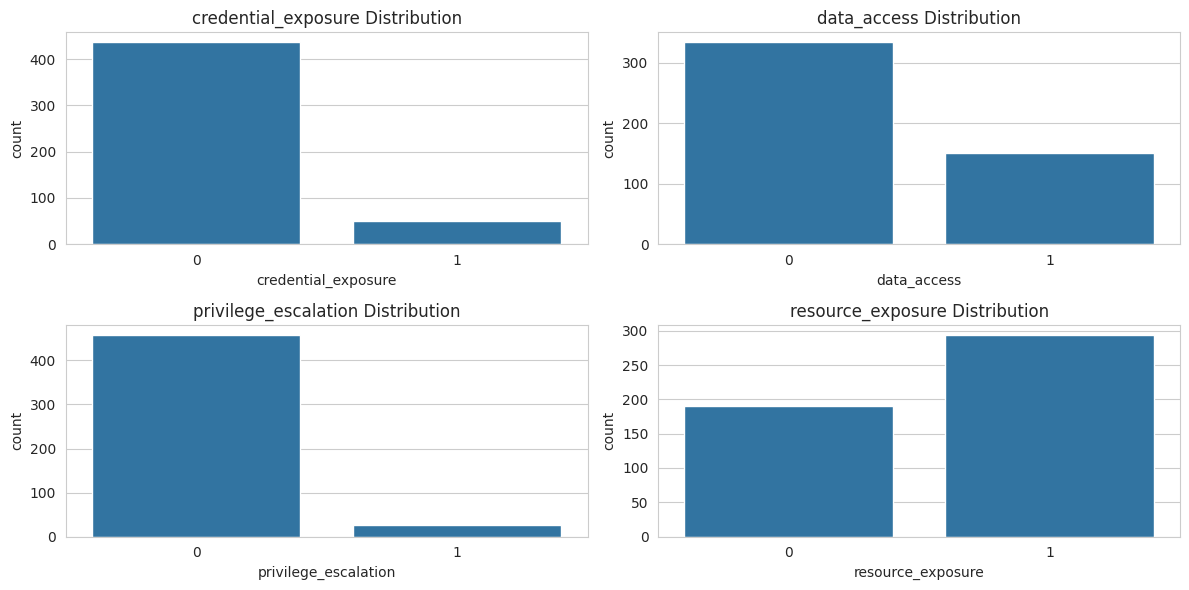

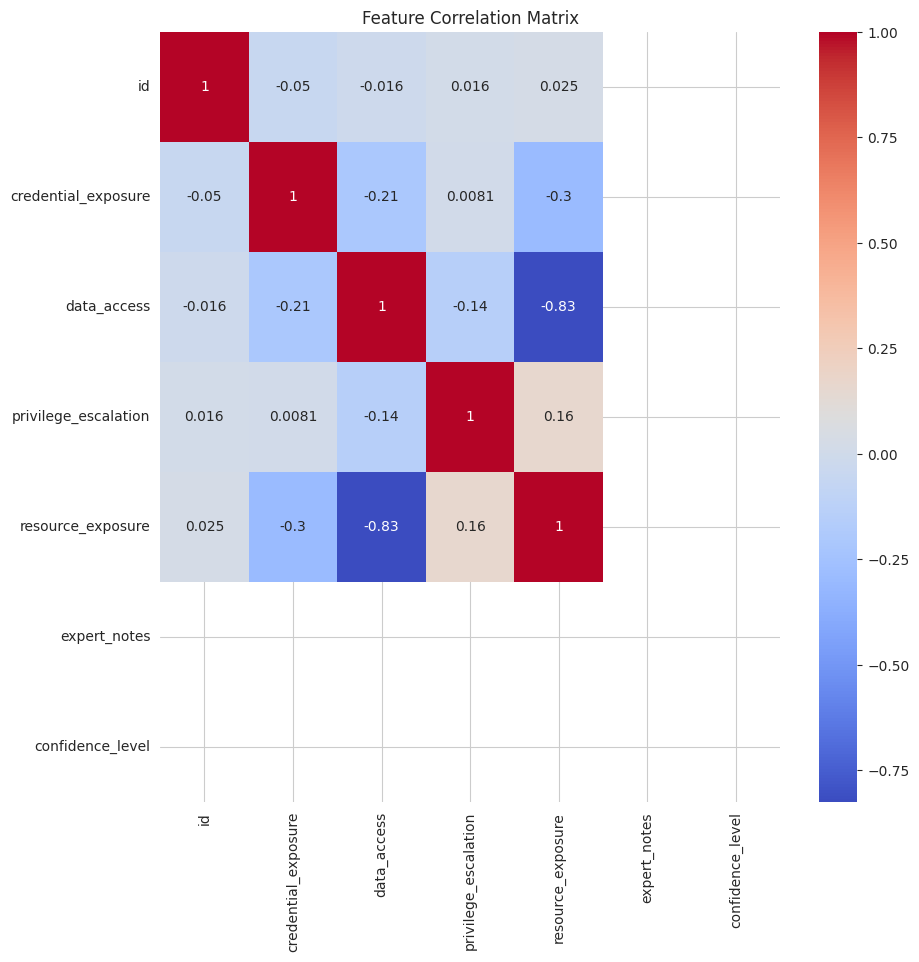

In [43]:
# Section 8: Data Export

import pandas as pd
import numpy as np
import json
import yaml
from datetime import datetime
from typing import Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns

class IAMDataExporter:
    def __init__(self, config, logger):
        self.config = config
        self.logger = logger
        self.export_path = f"{config['paths']['processed_data']}/export"
        os.makedirs(self.export_path, exist_ok=True)

    def generate_dataset_statistics(self,
                                  df: pd.DataFrame,
                                  processed_splits: Dict) -> Dict[str, Any]:
        """Generate comprehensive dataset statistics"""
        stats = {
            'general': {
                'total_samples': len(df),
                'total_features': processed_splits['train']['features'].shape[1],
                'risk_categories': self.config['data']['risk_categories'],
                'class_distribution': {
                    category: df[category].value_counts().to_dict()
                    for category in self.config['data']['risk_categories']
                }
            },
            'splits': {
                split: {
                    'samples': data['features'].shape[0],
                    'feature_shape': data['features'].shape,
                    'label_shape': data['labels'].shape
                }
                for split, data in processed_splits.items()
            },
            'features': {
                'numerical_stats': df.describe().to_dict(),
                'missing_values': df.isnull().sum().to_dict(),
                'unique_values': df.nunique().to_dict()
            }
        }
        return stats

    def create_dataset_documentation(self,
                                   stats: Dict[str, Any],
                                   feature_names: List[str]) -> str:
        """Create detailed dataset documentation"""
        doc = f"""# IAM Risk Classification Dataset Documentation
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Dataset Overview
- Total Samples: {stats['general']['total_samples']}
- Total Features: {stats['general']['total_features']}
- Risk Categories: {', '.join(stats['general']['risk_categories'])}

## Data Splits
"""
        for split, info in stats['splits'].items():
            doc += f"\n### {split.capitalize()} Split\n"
            doc += f"- Samples: {info['samples']}\n"
            doc += f"- Feature Shape: {info['feature_shape']}\n"
            doc += f"- Label Shape: {info['label_shape']}\n"

        doc += "\n## Features\n"
        for i, feature in enumerate(feature_names):
            doc += f"{i+1}. {feature}\n"

        doc += "\n## Class Distribution\n"
        for category, dist in stats['general']['class_distribution'].items():
            doc += f"\n### {category}\n"
            for label, count in dist.items():
                doc += f"- {label}: {count}\n"

        return doc

    def create_feature_metadata(self,
                              feature_names: List[str],
                              stats: Dict[str, Any]) -> Dict[str, Any]:
        """Create detailed feature metadata"""
        metadata = {
            'features': {
                name: {
                    'index': i,
                    'type': 'numeric',
                    'description': f"Feature representing {name}",
                    'statistics': stats['features']['numerical_stats'].get(name, {})
                }
                for i, name in enumerate(feature_names)
            },
            'preprocessing': {
                'scaler': 'StandardScaler',
                'tokenizer': self.config['model']['architecture'],
                'max_length': self.config['model']['max_length']
            },
            'labels': {
                category: {
                    'type': 'binary',
                    'distribution': dist
                }
                for category, dist in stats['general']['class_distribution'].items()
            }
        }
        return metadata

    def generate_visualizations(self,
                              df: pd.DataFrame,
                              stats: Dict[str, Any]) -> None:
        """Generate and save visualizations"""
        # Class distribution plot
        plt.figure(figsize=(12, 6))
        for i, category in enumerate(self.config['data']['risk_categories']):
            plt.subplot(2, 2, i+1)
            sns.countplot(data=df, x=category)
            plt.title(f"{category} Distribution")
        plt.tight_layout()
        plt.savefig(f"{self.export_path}/class_distribution.png")

        # Feature correlation matrix
        plt.figure(figsize=(10, 10))
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title("Feature Correlation Matrix")
        plt.savefig(f"{self.export_path}/feature_correlations.png")

    def export_all(self,
                   df: pd.DataFrame,
                   processed_splits: Dict,
                   feature_names: List[str]) -> None:
        """Export all dataset artifacts"""
        self.logger.info("Starting data export")

        # Generate statistics
        stats = self.generate_dataset_statistics(df, processed_splits)

        # Create documentation
        documentation = self.create_dataset_documentation(stats, feature_names)
        with open(f"{self.export_path}/dataset_documentation.md", 'w') as f:
            f.write(documentation)

        # Create and save metadata
        metadata = self.create_feature_metadata(feature_names, stats)
        with open(f"{self.export_path}/feature_metadata.json", 'w') as f:
            json.dump(metadata, f, indent=2)

        # Generate visualizations
        self.generate_visualizations(df, stats)

        # Save statistics
        with open(f"{self.export_path}/dataset_statistics.json", 'w') as f:
            json.dump(stats, f, indent=2)

        # Create dataset card in YAML format
        dataset_card = {
            'name': 'iam_risk_classification',
            'version': '1.0.0',
            'description': 'Multi-label classification of cloud IAM actions by risk category',
            'features': len(feature_names),
            'samples': len(df),
            'classes': self.config['data']['risk_categories'],
            'created_at': datetime.now().isoformat(),
            'statistics_summary': stats['general']
        }

        with open(f"{self.export_path}/dataset_card.yaml", 'w') as f:
            yaml.dump(dataset_card, f)

        self.logger.info("Data export completed successfully")

# Load necessary data
data_path = os.path.join(config['paths']['processed_data'], 'processed_labels.csv')
df = pd.read_csv(data_path)

# Load processed splits
processed_splits = {
    split: {
        'features': np.load(f"{config['paths']['processed_data']}/{split}_features.npy"),
        'labels': np.load(f"{config['paths']['processed_data']}/{split}_labels.npy"),
        'encodings': torch.load(f"{config['paths']['processed_data']}/{split}_encodings.pt")
    }
    for split in ['train', 'val', 'test']
}

# Load feature names
with open(f"{config['paths']['processed_data']}/feature_names.json", 'r') as f:
    feature_names = json.load(f)

# Initialize exporter and export all data
exporter = IAMDataExporter(config, logger)
exporter.export_all(df, processed_splits, feature_names)

Section 1: Setup and Data Loading

* Import dependencies
* Load processed datasets
* Initialize Weights & Biases
* Set up experiment tracking

In [53]:
 with open(f"{PROJECT_DIR}/config/config.json", 'r') as f:
    config = json.load(f)

In [54]:
import os
import sys
import json
import numpy as np
import pandas as pd
import torch
import wandb
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from typing import Dict, Tuple, List
import logging
from datetime import datetime

class DataLoader:
    def __init__(self, config: Dict):
        self.config = config
        self.data_path = config['paths']['processed_data']

    def load_data(self) -> Dict[str, Tuple[np.ndarray, np.ndarray]]:
        """Load processed datasets"""
        data = {}
        for split in ['train', 'val', 'test']:
            features = np.load(f"{self.data_path}/{split}_features.npy")
            labels = np.load(f"{self.data_path}/{split}_labels.npy")
            encodings = torch.load(f"{self.data_path}/{split}_encodings.pt")

            data[split] = {
                'features': features,
                'labels': labels,
                'encodings': encodings
            }

        logger.info("Loaded all data splits successfully")
        return data

class ExperimentTracker:
    def __init__(self, config: Dict):
        self.config = config
        self.run = None

    def init_wandb(self, model_name: str):
        """Initialize Weights & Biases tracking"""
        self.run = wandb.init(
            project=self.config['project']['name'],
            name=f"{model_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
            config=self.config,
            tags=['model_development']
        )

    def log_metrics(self, metrics: Dict, step: int = None):
        """Log metrics to Weights & Biases"""
        if self.run is not None:
            wandb.log(metrics, step=step)

    def log_model(self, model, model_name: str):
        """Log model artifacts"""
        if self.run is not None:
            model_path = f"{self.config['paths']['models']}/{model_name}.pkl"
            wandb.save(model_path)

def evaluate_predictions(y_true: np.ndarray,
                       y_pred: np.ndarray,
                       threshold: float = 0.5) -> Dict:
    """Evaluate model predictions"""
    # Convert probabilities to binary predictions
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred_binary = (y_pred > threshold).astype(int)
    else:
        y_pred_binary = (y_pred > threshold).astype(int)

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true,
        y_pred_binary,
        average='macro',
        zero_division=0
    )

    accuracy = accuracy_score(y_true, y_pred_binary)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


data_loader = DataLoader(config)
data = data_loader.load_data()

# Initialize experiment tracker
tracker = ExperimentTracker(config)

# Log basic dataset info
print(f"Training set shape: {data['train']['features'].shape}")
print(f"Validation set shape: {data['val']['features'].shape}")
print(f"Test set shape: {data['test']['features'].shape}")

Training set shape: (339, 1006)
Validation set shape: (73, 1006)
Test set shape: (73, 1006)


<ipython-input-54-71ba593be910>:24: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Section 2: Baseline Model
* Basic architecture
* Training loop
* Performance evaluation
* Error analysis

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import wandb

class IAMDataset(Dataset):
    def __init__(self, features: np.ndarray, labels: np.ndarray):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

class SimpleIAMClassifier(nn.Module):
    def __init__(self, input_dim: int, hidden_dims: List[int], num_classes: int, dropout: float = 0.5):
        super().__init__()

        # Build layers dynamically
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout)
            ])
            prev_dim = hidden_dim

        # Output layer
        layers.append(nn.Linear(prev_dim, num_classes))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

class NeuralNetworkTrainer:
    def __init__(self, config: Dict, tracker: ExperimentTracker):
        self.config = config
        self.tracker = tracker
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.criterion = nn.BCELoss()

    def create_dataloaders(self, data: Dict) -> Dict[str, DataLoader]:
        """Create PyTorch DataLoaders for each split"""
        dataloaders = {}
        for split in ['train', 'val', 'test']:
            dataset = IAMDataset(data[split]['features'], data[split]['labels'])
            dataloaders[split] = DataLoader(
                dataset,
                batch_size=self.config['model']['batch_size'],
                shuffle=(split == 'train'),
                num_workers=2
            )
        return dataloaders

    def train_epoch(self,
                    model: nn.Module,
                    dataloader: DataLoader,
                    optimizer: optim.Optimizer) -> Tuple[float, Dict]:
        """Train for one epoch"""
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []

        for batch_idx, (features, labels) in enumerate(dataloader):
            features, labels = features.to(self.device), labels.to(self.device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(features)
            loss = self.criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            all_preds.append(outputs.detach().cpu().numpy())
            all_labels.append(labels.cpu().numpy())

        # Calculate epoch metrics
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        metrics = evaluate_predictions(all_labels, all_preds)

        return total_loss / len(dataloader), metrics

    def evaluate(self,
                model: nn.Module,
                dataloader: DataLoader) -> Tuple[float, Dict, np.ndarray, np.ndarray]:
        """Evaluate model"""
        model.eval()
        total_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for features, labels in dataloader:
                features, labels = features.to(self.device), labels.to(self.device)
                outputs = model(features)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                all_preds.append(outputs.cpu().numpy())
                all_labels.append(labels.cpu().numpy())

        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        metrics = evaluate_predictions(all_labels, all_preds)

        return total_loss / len(dataloader), metrics, all_preds, all_labels

    def train_model(self,
                   model: nn.Module,
                   dataloaders: Dict[str, DataLoader],
                   num_epochs: int) -> Dict:
        """Train model"""
        model = model.to(self.device)
        optimizer = optim.Adam(model.parameters(), lr=self.config['model']['learning_rate'])

        best_val_loss = float('inf')
        best_metrics = None
        training_history = {
            'train_loss': [], 'val_loss': [],
            'train_metrics': [], 'val_metrics': []
        }

        for epoch in range(num_epochs):
            # Train
            train_loss, train_metrics = self.train_epoch(model, dataloaders['train'], optimizer)

            # Validate
            val_loss, val_metrics, _, _ = self.evaluate(model, dataloaders['val'])

            # Log metrics
            self.tracker.log_metrics({
                'epoch': epoch,
                'train_loss': train_loss,
                'val_loss': val_loss,
                **{f'train_{k}': v for k, v in train_metrics.items()},
                **{f'val_{k}': v for k, v in val_metrics.items()}
            })

            # Save training history
            training_history['train_loss'].append(train_loss)
            training_history['val_loss'].append(val_loss)
            training_history['train_metrics'].append(train_metrics)
            training_history['val_metrics'].append(val_metrics)

            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_metrics = val_metrics
                torch.save(model.state_dict(),
                          f"{self.config['paths']['models']}/best_neural_network.pt")

            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
            print(f"Val Metrics: {val_metrics}")

        return training_history

    def analyze_errors(self,
                  model: nn.Module,
                  dataloader: DataLoader,
                  class_names: List[str]) -> Dict:
        """Analyze model errors with improved metrics handling"""
        _, _, predictions, true_labels = self.evaluate(model, dataloader)

        # Convert to binary predictions
        pred_binary = (predictions > 0.5).astype(int)

        # Calculate per-class metrics with zero_division parameter
        report = classification_report(
            true_labels,
            pred_binary,
            target_names=class_names,
            output_dict=True,
            zero_division=0  # Explicitly handle division by zero
        )

        # Create confusion matrices for each class
        confusion_matrices = {}
        for i, class_name in enumerate(class_names):
            cm = confusion_matrix(true_labels[:, i], pred_binary[:, i])
            confusion_matrices[class_name] = cm

        # Calculate precision with handling for zero division
        def safe_precision(y_true, y_pred):
            tp = np.sum((y_pred == 1) & (y_true == 1))
            fp = np.sum((y_pred == 1) & (y_true == 0))
            return tp / (tp + fp) if (tp + fp) > 0 else 0

        # Analyze error patterns with improved metrics
        error_analysis = {
            'false_positives': {
                class_name: int(confusion_matrices[class_name][0, 1])  # Convert to regular int
                for class_name in class_names
            },
            'false_negatives': {
                class_name: int(confusion_matrices[class_name][1, 0])  # Convert to regular int
                for class_name in class_names
            },
            'class_report': report,
            'per_class_precision': {
                class_name: safe_precision(true_labels[:, i], pred_binary[:, i])
                for i, class_name in enumerate(class_names)
            }
        }

        # Visualize confusion matrices
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))
        for i, (class_name, cm) in enumerate(confusion_matrices.items()):
            ax = axes[i//2, i%2]
            sns.heatmap(cm, annot=True, fmt='d', ax=ax)
            ax.set_title(f'Confusion Matrix - {class_name}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('True')

        plt.tight_layout()
        if hasattr(wandb, 'log'):  # Check if wandb is available
            wandb.log({"confusion_matrices": wandb.Image(fig)})
        plt.close()

        return error_analysis

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

# Initialize trainer
trainer = NeuralNetworkTrainer(config, tracker)

# Create dataloaders
dataloaders = trainer.create_dataloaders(data)

# Initialize model
input_dim = data['train']['features'].shape[1]
num_classes = data['train']['labels'].shape[1]
model = SimpleIAMClassifier(
    input_dim=input_dim,
    hidden_dims=[256, 128, 64],
    num_classes=num_classes,
    dropout=config['model']['dropout']
)

# Train model
tracker.init_wandb("neural_network")
history = trainer.train_model(model, dataloaders, config['model']['epochs'])

# Analyze errors
error_analysis = trainer.analyze_errors(
    model,
    dataloaders['test'],
    config['data']['risk_categories']
)

# Log error analysis
print("Error Analysis Results:")
print(f"Classification Report:\n{error_analysis['class_report']}")
print(f"False Positives: {error_analysis['false_positives']}")
print(f"False Negatives: {error_analysis['false_negatives']}")

# Save error analysis
with open(f"{config['paths']['models']}/neural_network_error_analysis.json", 'w') as f:
    json.dump(error_analysis, f, indent=2, cls=NpEncoder)

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▂▂▃█▃▇██
train_f1,▁▂▂▃▄▅▅▆▆█
train_loss,█▇▇▆▆▄▃▄▃▁
train_precision,▁▂▃▃▄▅▅▆▆█
train_recall,▁▂▂▂▄▅▄▅▄█
val_accuracy,▁█▅▄▄▃▄▄▅▄
val_f1,▁▇▆▆▇▇▇▇█▇
val_loss,█▃▅▆▇▆▄▄▁▂
val_precision,▁▆▃▄▅▅▇▆█▆
val_recall,▁▇▇▇███▇██


Epoch 1/100
Train Loss: 0.7336, Val Loss: 0.7162
Val Metrics: {'accuracy': 0.0, 'precision': 0.16286435266247812, 'recall': 0.369047619047619, 'f1': 0.10698412698412699}
Epoch 2/100
Train Loss: 0.7242, Val Loss: 0.7289
Val Metrics: {'accuracy': 0.0273972602739726, 'precision': 0.2630050505050505, 'recall': 0.5933333333333334, 'f1': 0.2263930961911378}
Epoch 3/100
Train Loss: 0.7096, Val Loss: 0.7316
Val Metrics: {'accuracy': 0.0136986301369863, 'precision': 0.2817708333333333, 'recall': 0.6154761904761905, 'f1': 0.2684175306126526}
Epoch 4/100
Train Loss: 0.7036, Val Loss: 0.7329
Val Metrics: {'accuracy': 0.0410958904109589, 'precision': 0.30773011880421086, 'recall': 0.6614285714285715, 'f1': 0.3120212508080155}
Epoch 5/100
Train Loss: 0.6840, Val Loss: 0.7269
Val Metrics: {'accuracy': 0.0547945205479452, 'precision': 0.30900561918811853, 'recall': 0.6692857142857143, 'f1': 0.3168430823918629}
Epoch 6/100
Train Loss: 0.6934, Val Loss: 0.7243
Val Metrics: {'accuracy': 0.054794520547945

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer, get_linear_schedule_with_warmup
from sklearn.metrics import precision_recall_curve
import numpy as np
from typing import Dict, List, Tuple, Optional
import wandb
from tqdm import tqdm

class IAMBERTDataset(Dataset):
    def __init__(self, texts: List[str], labels: np.ndarray, tokenizer: AutoTokenizer, max_length: int):
        self.texts = texts
        self.labels = torch.FloatTensor(labels)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': self.labels[idx]
        }

class IAMBERTClassifier(nn.Module):
    def __init__(self,
                 model_name: str,
                 num_labels: int,
                 dropout: float = 0.3,
                 freeze_bert: bool = False):
        super().__init__()

        # Load pre-trained BERT model
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)

        # Custom classification head
        hidden_size = self.bert.config.hidden_size
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size // 2),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, num_labels),
            nn.Sigmoid()
        )

        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Get BERT embeddings
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use [CLS] token representation
        pooled_output = outputs.last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)

        # Classification
        return self.classifier(pooled_output)

class FocalLoss(nn.Module):
    def __init__(self, alpha: float = 1, gamma: float = 2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        bce_loss = nn.BCELoss(reduction='none')(inputs, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss
        return focal_loss.mean()

class ASLLoss(nn.Module):
    """Asymmetric Loss for multi-label classification"""
    def __init__(self, gamma_neg=4, gamma_pos=1, clip=0.05):
        super().__init__()
        self.gamma_neg = gamma_neg
        self.gamma_pos = gamma_pos
        self.clip = clip

    def forward(self, x, y):
        x = x.clamp(min=self.clip, max=1-self.clip)

        # Positive and negative parts
        xs_pos = x
        xs_neg = 1 - x

        # Asymmetric clipping
        if self.clip is not None:
            xs_neg = (xs_neg + self.clip).clamp(max=1)

        # Basic probabilities
        los_pos = y * torch.log(xs_pos)
        los_neg = (1 - y) * torch.log(xs_neg)

        # Asymmetric focusing
        if self.gamma_neg > 0 or self.gamma_pos > 0:
            pt0 = xs_pos * y
            pt1 = xs_neg * (1 - y)
            pt = pt0 + pt1
            one_sided_gamma = self.gamma_pos * y + self.gamma_neg * (1 - y)
            one_sided_w = torch.pow(1 - pt, one_sided_gamma)
            loss = one_sided_w * (los_pos + los_neg)
        else:
            loss = los_pos + los_neg

        return -loss.mean()

class ThresholdOptimizer:
    def __init__(self, num_labels: int):
        self.num_labels = num_labels
        self.thresholds = np.ones(num_labels) * 0.5

    def optimize_thresholds(self,
                          y_true: np.ndarray,
                          y_pred: np.ndarray) -> np.ndarray:
        """Optimize thresholds for each label using PR curves"""
        optimal_thresholds = []

        for i in range(self.num_labels):
            precision, recall, thresholds = precision_recall_curve(
                y_true[:, i], y_pred[:, i]
            )

            # Calculate F1 score for each threshold
            f1_scores = 2 * (precision * recall) / (precision + recall + 1e-7)
            optimal_idx = np.argmax(f1_scores)

            # Get threshold that maximizes F1
            if len(thresholds) > optimal_idx:
                optimal_thresholds.append(thresholds[optimal_idx])
            else:
                optimal_thresholds.append(0.5)

        self.thresholds = np.array(optimal_thresholds)
        return self.thresholds

    def predict(self, y_pred: np.ndarray) -> np.ndarray:
        """Apply optimized thresholds to predictions"""
        return (y_pred > self.thresholds).astype(int)

class BERTTrainer:
    def __init__(self, config: Dict, tracker: ExperimentTracker):
        self.config = config
        self.tracker = tracker
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.threshold_optimizer = ThresholdOptimizer(len(config['data']['risk_categories']))

    def create_dataloaders(self, data: Dict, tokenizer: AutoTokenizer) -> Dict[str, DataLoader]:
        """Create PyTorch DataLoaders for each split"""
        dataloaders = {}
        for split in ['train', 'val', 'test']:
            dataset = IAMBERTDataset(
                texts=data[split]['descriptions'],
                labels=data[split]['labels'],
                tokenizer=tokenizer,
                max_length=self.config['model']['max_length']
            )
            dataloaders[split] = DataLoader(
                dataset,
                batch_size=self.config['model']['batch_size'],
                shuffle=(split == 'train'),
                num_workers=2
            )
        return dataloaders

    def train_model(self,
                   model: nn.Module,
                   dataloaders: Dict[str, DataLoader],
                   num_epochs: int,
                   unfreeze_epoch: Optional[int] = None) -> Dict:
        """Train model with learning rate scheduling and gradual unfreezing"""
        model = model.to(self.device)

        # Initialize optimizer and scheduler
        optimizer = optim.AdamW(
            model.parameters(),
            lr=self.config['model']['learning_rate'],
            weight_decay=0.01
        )

        # Calculate total steps for scheduler
        total_steps = len(dataloaders['train']) * num_epochs
        warmup_steps = int(total_steps * 0.1)  # 10% of total steps for warmup

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps
        )

        # Initialize loss functions
        criterion = ASLLoss()

        best_val_loss = float('inf')
        training_history = {
            'train_loss': [], 'val_loss': [],
            'train_metrics': [], 'val_metrics': []
        }

        for epoch in range(num_epochs):
            # Unfreeze BERT layers gradually
            if unfreeze_epoch and epoch >= unfreeze_epoch:
                for param in model.bert.parameters():
                    param.requires_grad = True

            # Training
            model.train()
            train_loss = 0
            train_predictions = []
            train_labels = []

            for batch in tqdm(dataloaders['train'], desc=f'Epoch {epoch+1}/{num_epochs}'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                optimizer.zero_grad()
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()

                train_loss += loss.item()
                train_predictions.append(outputs.detach().cpu().numpy())
                train_labels.append(labels.cpu().numpy())

            # Validation
            model.eval()
            val_loss = 0
            val_predictions = []
            val_labels = []

            with torch.no_grad():
                for batch in dataloaders['val']:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    outputs = model(input_ids, attention_mask)
                    loss = criterion(outputs, labels)

                    val_loss += loss.item()
                    val_predictions.append(outputs.cpu().numpy())
                    val_labels.append(labels.cpu().numpy())

            # Calculate metrics
            train_predictions = np.vstack(train_predictions)
            train_labels = np.vstack(train_labels)
            val_predictions = np.vstack(val_predictions)
            val_labels = np.vstack(val_labels)

            # Optimize thresholds on validation set
            if epoch == num_epochs - 1:
                self.threshold_optimizer.optimize_thresholds(val_labels, val_predictions)

            # Calculate metrics with optimized thresholds
            train_metrics = evaluate_predictions(
                train_labels,
                self.threshold_optimizer.predict(train_predictions)
            )
            val_metrics = evaluate_predictions(
                val_labels,
                self.threshold_optimizer.predict(val_predictions)
            )

            # Log metrics
            self.tracker.log_metrics({
                'epoch': epoch,
                'train_loss': train_loss / len(dataloaders['train']),
                'val_loss': val_loss / len(dataloaders['val']),
                'learning_rate': scheduler.get_last_lr()[0],
                **{f'train_{k}': v for k, v in train_metrics.items()},
                **{f'val_{k}': v for k, v in val_metrics.items()}
            })

            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(),
                          f"{self.config['paths']['models']}/best_bert_model.pt")

        return training_history

# Initialize trainer
trainer = BERTTrainer(config, tracker)

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(config['model']['architecture'])
model = IAMBERTClassifier(
    model_name=config['model']['architecture'],
    num_labels=len(config['data']['risk_categories']),
    dropout=config['model']['dropout'],
    freeze_bert=True  # Start with frozen BERT layers
)

# Create dataloaders
dataloaders = trainer.create_dataloaders(data, tokenizer)

# Train model with gradual unfreezing
tracker.init_wandb("bert_classifier")
history = trainer.train_model(
    model,
    dataloaders,
    num_epochs=config['model']['epochs'],
    unfreeze_epoch=3  # Unfreeze BERT layers after 3 epochs
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

KeyError: 'descriptions'